## Imports

In [1]:
## Data Management
import pandas as pd
from collections import Counter
import re
## Data Visualization
import matplotlib.pyplot as plt

# 
<p style="background-color:#178268; font-family: arial black; color:#FFF9ED; font-size: 300%; text-align: center;">BillBoard DataFrame</p>

## Read Data & Prepare DataFrames

#### Main DF

In [2]:
# Load dataset
df = pd.read_csv('data/billboard_top25_songs.csv')
df.head()

,year,pos,title,artist,lyrics,genre,anger,joy,sadness,top_emotion,num_words
0,2005,1,We Belong Together,Mariah Carey,"Sweet love, yeah I didn't mean it when...",pop,2.34,3.08,79.60,sadness,465
1,2005,2,Hollaback Girl,Gwen Stefani,"Uh-huh, this my shit All the girls, stomp ...",pop,16.38,6.33,13.48,anger,455
2,2005,3,Let Me Love You,Mario,"Mmm, ah Mmm, yeah Mmm Yeah, yeah, yeah ...",unknown,10.44,33.30,18.47,joy,492
3,2005,4,Since U Been Gone,Kelly Clarkson,"Here's the thing, we started out friendsI...",pop,8.33,16.04,14.95,joy,256
4,2005,5,"1, 2 Step",Ciara,"Ladies and gentlemen (Ladies and gentlemen,...",r&b,19.60,35.38,8.97,joy,487


#### Emotions Score per Year

In [3]:
# Dataset per years
df_mean_year = df.groupby('year').mean(numeric_only=True).round(2).reset_index()
df_mean_year = df_mean_year.drop(columns=['pos'])
df_mean_year.head(5)

,year,anger,joy,sadness,num_words
0,2005,10.02,16.34,23.15,514.88
1,2006,9.33,15.48,23.16,560.64
2,2007,9.46,20.46,26.63,507.41
3,2008,5.60,19.52,20.90,492.84
4,2009,7.60,11.49,31.82,491.04


In [4]:
# Emotions mean
mean_anger = df['anger'].mean()
mean_joy = df['joy'].mean()
mean_sadness = df['sadness'].mean()

#### Emotion score mean per Genre

In [5]:
# Dataset per genres
df_mean_genre = df.groupby('genre').mean(numeric_only=True).reset_index()
df_mean_genre = df_mean_genre.drop(columns=['pos','year'])
# Remove 'unknown' genre
df_mean_genre = df_mean_genre[df_mean_genre['genre'] != 'unknown']
df_mean_genre.head(10)

,genre,anger,joy,sadness,num_words
0,2000s,7.850769,16.401731,24.569615,560.384615
1,2010s,8.010323,13.521398,30.300430,382.956989
2,2020s,10.256429,19.214286,32.977857,379.642857
3,blues,4.710833,14.490833,33.810833,357.666667
4,country,10.906250,24.089375,27.250000,362.625000
5,electronic,7.502174,17.083478,26.685217,363.608696
6,hip-hop,12.839189,18.322432,23.388649,599.648649
7,pop,8.674224,14.149741,30.715172,407.775862
8,r&b,9.095192,18.888462,28.350385,491.596154
9,rap,16.568621,14.471724,22.491724,554.482759


#### Emotion score mean per Pos

In [6]:
# Datsaset per positions
df_mean_rank = df.copy()
df_mean_rank = df_mean_rank.groupby('pos')[['anger', 'joy', 'sadness']].mean().round(2).reset_index()
df_mean_rank.head(10)

,pos,anger,joy,sadness
0,1,5.71,15.92,35.54
1,2,11.25,15.78,26.94
2,3,7.26,14.66,31.55
3,4,8.11,15.28,26.27
4,5,9.11,20.94,19.91
5,6,10.46,21.21,19.87
6,7,8.53,9.36,37.18
7,8,6.98,13.19,35.64
8,9,11.16,19.55,22.72
9,10,6.88,12.46,29.40


#### Most frequent words per emotion

In [7]:
# Function to get most frequent words with specific emotion
def most_frequent_words(df, emotion, top_n=15):
    # Filter rows per top_emotion
    emotion_lyrics = df[df['top_emotion'] == emotion]['lyrics'].str.lower().str.cat(sep=' ')
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', emotion_lyrics)
    # Count word frequencies but excluding stopwords
    stopwords = set(['the', 'and', 'to', 'a', 'ah', 'of', 'in', 'it', 'is', 'i', 'you', 'on', 'for', 'that', 'with', 'my', 'me', 'your','hey','ain',
        'but', 'so', 'at', 'we', 'all', 'be', 'this', 'not', 'no', 'are', 'do', 'just', 'like', 'up', 'out', 'if','na','la','ayy', 'doh',
        'now', 'oh', 'get', 'go', 'was', 'have', 'when', 'what', 'can', 'from', 'by', 'one', 'as', 'too', 'don', 't', 'm', 'yeah','ma',
        'll', 're', 've', 's', 'he', 'she', 'they', 'them', 'her', 'him', 'his', 'our', 'us', 'been', 'will', 'cause','ooh','got','uh','know','wit'
    ])
    filtered_words = [word for word in words if word not in stopwords]
    most_common = Counter(filtered_words).most_common(top_n)
    return most_common

emotions_list = ['anger', 'joy', 'sadness']
top_words_emotion = {emotion: most_frequent_words(df, emotion) for emotion in emotions_list}

#### Most frequent words per Decade

In [8]:
# Function to get most frequent words for a specific genre
def most_frequent_words_genre(df, genre, top_n=15):
    # Filter rows per genre
    genre_lyrics = df[df['genre'] == genre]['lyrics'].str.lower().str.cat(sep=' ')
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', genre_lyrics)
    # Count word frequencies but excluding stopwords
    stopwords = set(['the', 'and', 'to', 'a', 'ah', 'of', 'in', 'it', 'is', 'i', 'you', 'on', 'for', 'that', 'with', 'my', 'me', 'your','hey','ain',
        'but', 'so', 'at', 'we', 'all', 'be', 'this', 'not', 'no', 'are', 'do', 'just', 'like', 'up', 'out', 'if','na','la','ayy', 'doh', 'ha', 'eh',
        'now', 'oh', 'get', 'go', 'was', 'have', 'when', 'what', 'can', 'from', 'by', 'mm','one', 'as', 'too', 'don', 't', 'm', 'yeah','ma',
        'll', 're', 've', 's', 'he', 'she', 'they', 'them', 'her', 'him', 'his', 'our', 'us', 'been', 'will', 'cause','ooh','got','uh','know','wit'
    ])
    filtered_words = [word for word in words if word not in stopwords]
    most_common = Counter(filtered_words).most_common(top_n)
    return most_common

decade_list = ['2000s', '2010s', '2020s']
top_words_decade = {decade: most_frequent_words_genre(df, decade) for decade in decade_list}

#### Top 10 Artist with most songs

In [9]:
# List of artists with most songs
top10_artist = df.artist.value_counts().head(10)
# Filter df for top 10 artists
df_top10_artist = df[df['artist'].isin(top10_artist.index)]

## Visualizations

#### Average Emotion Scores in Billboard Top 25 Songs by Year

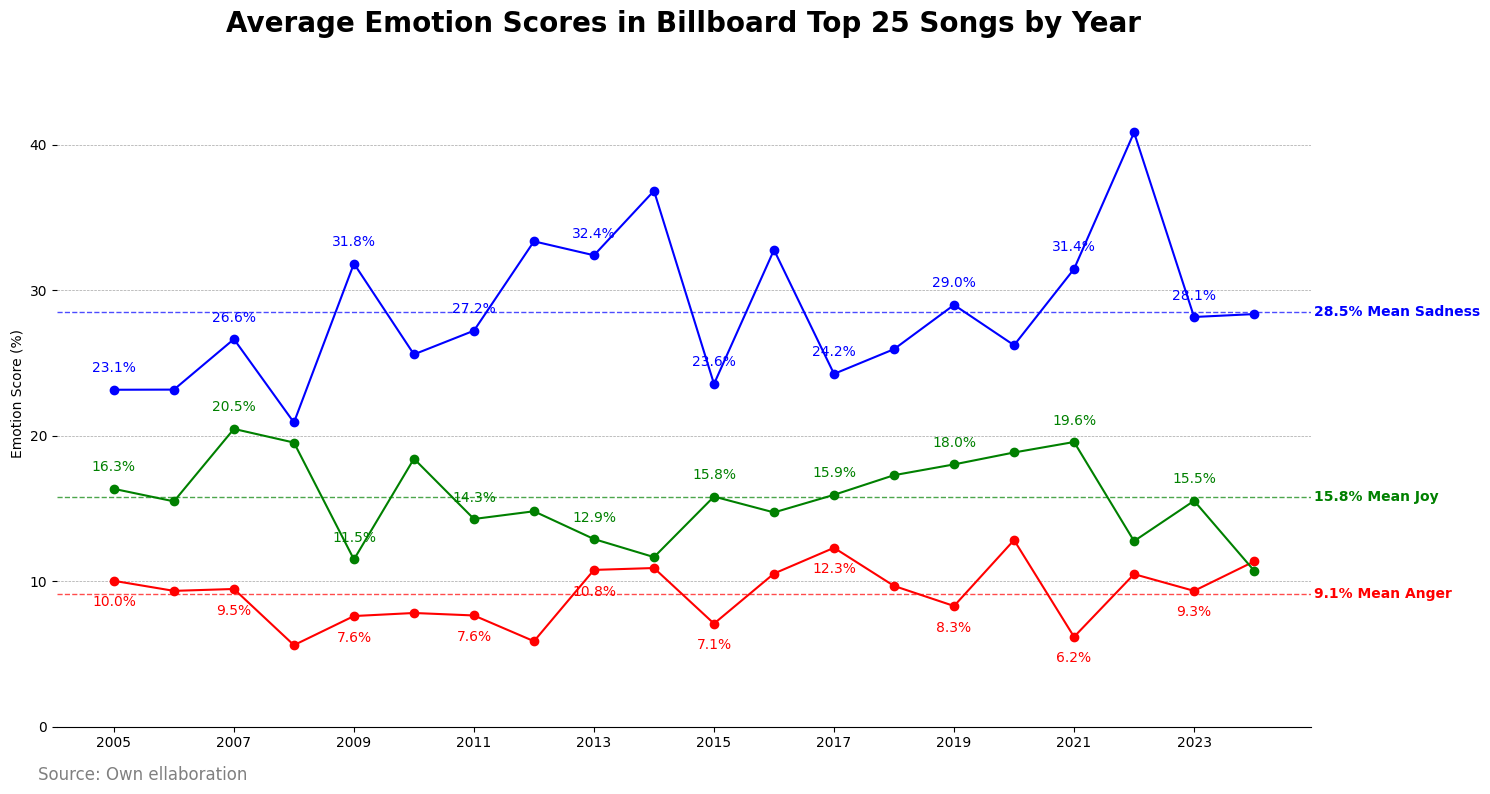

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

## Plot lines
ax.plot(df_mean_year['year'], df_mean_year['anger'], label='Anger', color='red', marker='o')
ax.plot(df_mean_year['year'], df_mean_year['joy'], label='Joy', color='green', marker='o')
ax.plot(df_mean_year['year'], df_mean_year['sadness'], label='Sadness', color='blue', marker='o')

## Labels
for i in range(0, len(df_mean_year), 2):
    ax.text(df_mean_year['year'][i], df_mean_year['anger'][i] - 1, f"{df_mean_year['anger'][i]:.1f}%", color='red', ha='center', va='top', fontsize=10)
    ax.text(df_mean_year['year'][i], df_mean_year['joy'][i] + 1, f"{df_mean_year['joy'][i]:.1f}%", color='green', ha='center', va='bottom', fontsize=10)
    ax.text(df_mean_year['year'][i], df_mean_year['sadness'][i] + 1, f"{df_mean_year['sadness'][i]:.1f}%", color='blue', ha='center', va='bottom', fontsize=10)

## Titles & Axes
ax.set_title('Average Emotion Scores in Billboard Top 25 Songs by Year', fontsize=20, pad=20, fontweight='bold', loc='center')
ax.set_ylabel('Emotion Score (%)')
# Set y-axis limit to start from 0
ax.set_ylim(0, max(df_mean_year['sadness']) + 5)
# Add grid y-axis
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Set x-axis ticks to every 2 years
years = df_mean_year['year']
ax.set_xticks(years[::2])
ax.set_xticklabels([str(int(y)) for y in years[::2]])

## Thresholds and legend
ax.axhline(mean_anger, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Mean Anger')
ax.axhline(mean_joy, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Mean Joy')
ax.axhline(mean_sadness, color='blue', linestyle='--', linewidth=1, alpha=0.7, label='Mean Sadness')
ax.text(years.iloc[-1]+1, mean_anger, f"{mean_anger:.1f}% Mean Anger ", color='red', va='center', fontsize=10, fontweight='bold')
ax.text(years.iloc[-1]+1, mean_joy, f"{mean_joy:.1f}% Mean Joy", color='green', va='center', fontsize=10, fontweight='bold')
ax.text(years.iloc[-1]+1, mean_sadness, f"{mean_sadness:.1f}% Mean Sadness", color='blue', va='center', fontsize=10, fontweight='bold')

# Remove the frame around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

##Source annotation
ax.annotate('Source: Own ellaboration', xy=(-0.015, -0.08), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

#### Emotion Scores per Genre

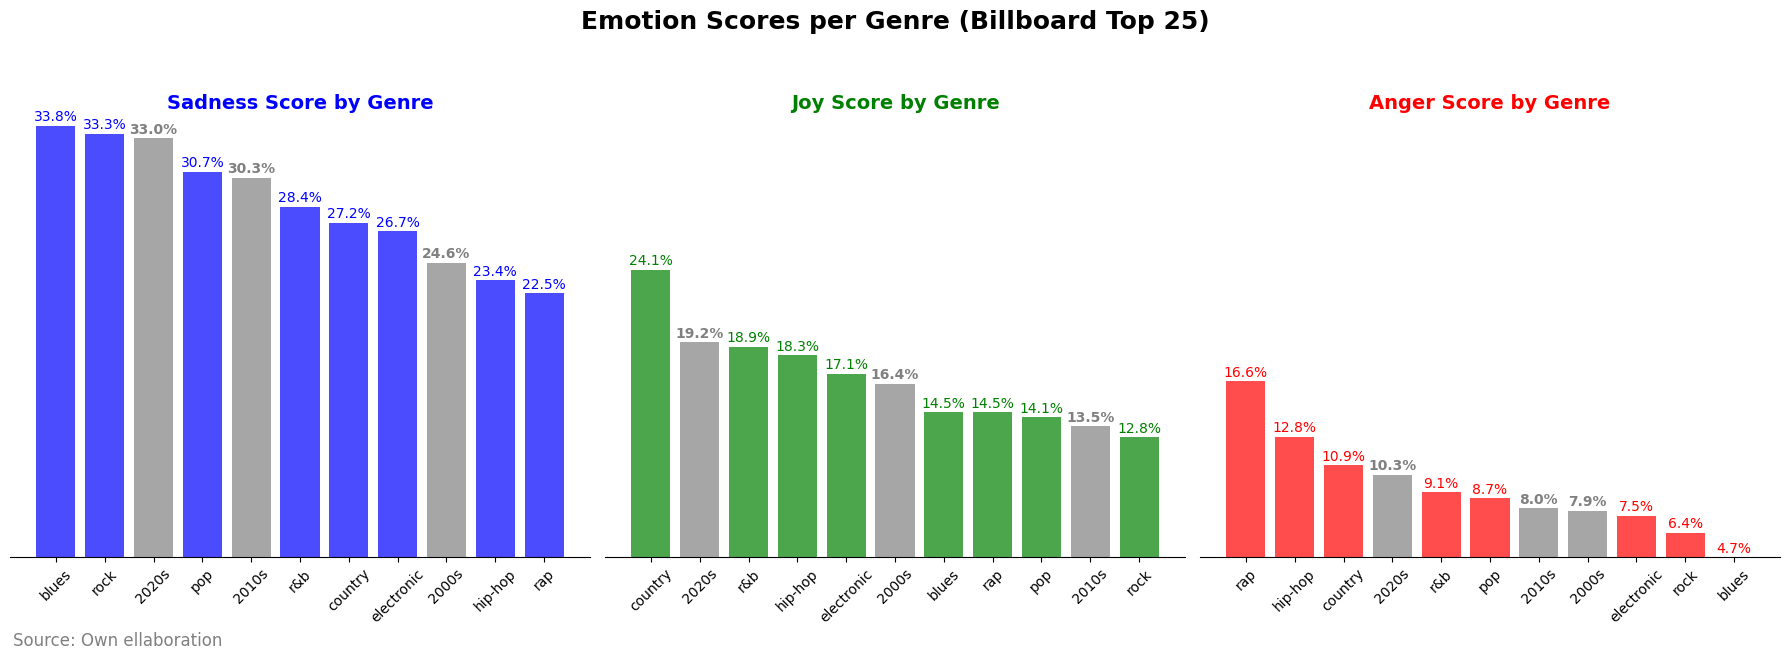

In [11]:
## Support Arrays and variables
emotions = ['sadness', 'joy', 'anger']
colors = ['blue', 'green', 'red']
titles = ['Sadness Score by Genre', 'Joy Score by Genre', 'Anger Score by Genre']
decades = ['2000s', '2010s', '2020s']
ymin = min(df_mean_genre[emotions].min())
ymax = max(df_mean_genre[emotions].max())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Emotion Scores per Genre (Billboard Top 25)', fontsize=18, fontweight='bold', y=1.05)
for idx, (emotion, color, title) in enumerate(zip(emotions, colors, titles)):
    # Sorted per emotion and highlight decades
    sorted_df = df_mean_genre.sort_values(by=emotion, ascending=False)
    bar_colors = ['grey' if genre in decades else color for genre in sorted_df['genre']]
    # Bars
    axes[idx].bar(sorted_df['genre'], sorted_df[emotion], color=bar_colors, alpha=0.7)
    axes[idx].set_title(title, fontsize=14, fontweight='bold', pad=12, color=color)
    # Axes
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].get_yaxis().set_visible(False)
    axes[idx].set_ylim(ymin, ymax) 

    # Remove frame
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['left'].set_visible(False)

    ## Labels
    for bar, genre in zip(axes[idx].patches, sorted_df['genre']):
        height = bar.get_height()
        text_color = 'grey' if genre in decades else color
        fontweight = 'bold' if genre in decades else 'normal'
        axes[idx].text(bar.get_x() + bar.get_width() / 2,height + 0.1,f"{height:.1f}%",ha='center',va='bottom',fontsize=10,color=text_color,fontweight=fontweight)

## Source annotation
fig.text(0.01, -0.01, 'Source: Own ellaboration', ha='left', fontsize=12, color='gray')


plt.tight_layout()
plt.show()

#### Most Common Words per Emotion

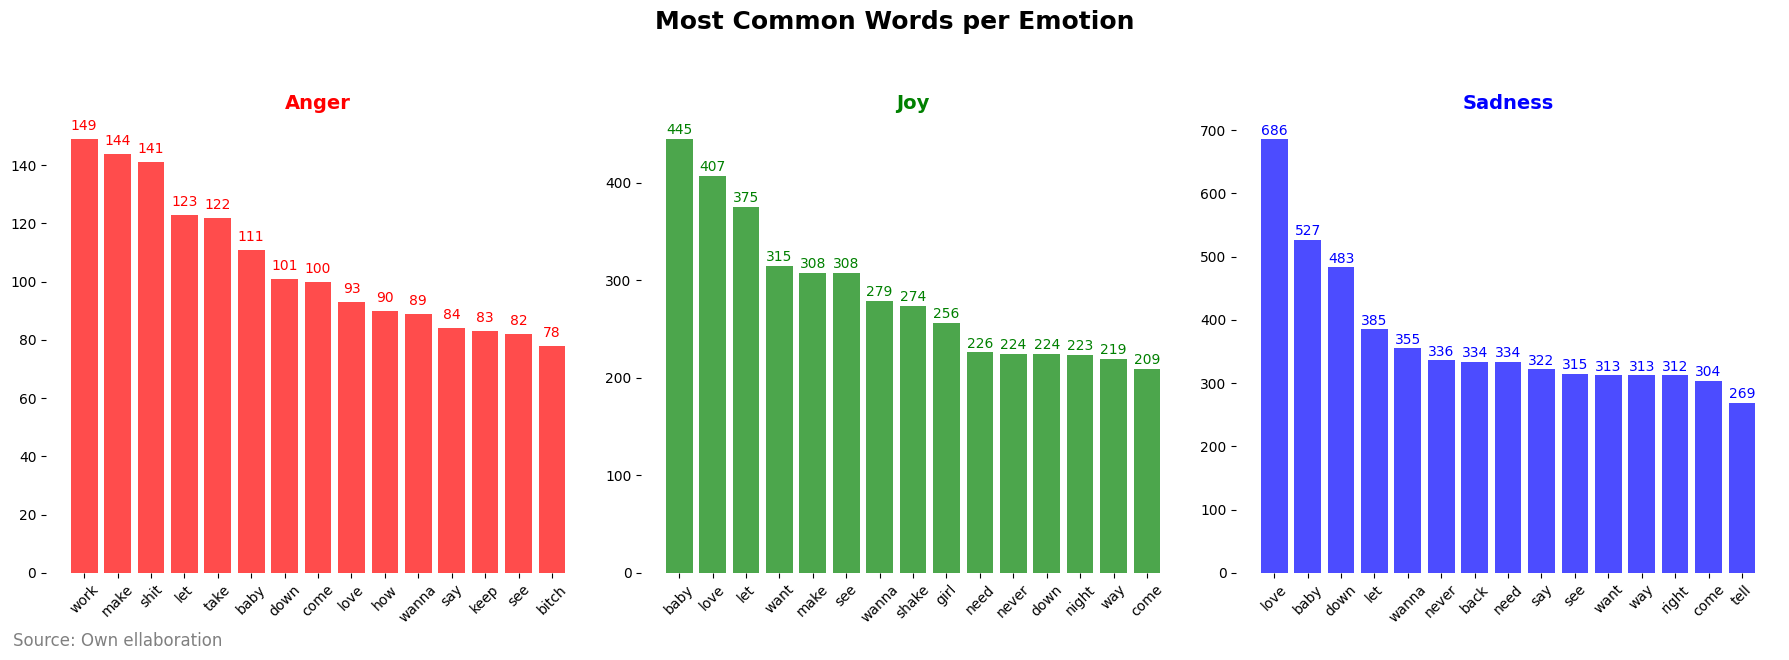

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['red', 'green', 'blue']

for idx, emotion in enumerate(emotions_list):
    words, counts = zip(*top_words_emotion[emotion])
    ## PLot bars
    axes[idx].bar(words, counts, color=colors[idx], alpha=0.7)
    ## Title & Axes
    axes[idx].set_title(f"{emotion.capitalize()}", fontsize=14, fontweight='bold', color=colors[idx])
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['left'].set_visible(False)
    axes[idx].spines['bottom'].set_visible(False)
    axes[idx].set_ylabel('')
    ## Labels
    for bar in axes[idx].patches:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width() / 2, height + 2, f"{int(height)}",ha='center',va='bottom',fontsize=10,color=colors[idx])

## Title
fig.suptitle('Most Common Words per Emotion', fontsize=18, fontweight='bold', y=1.05)
## Source annotation
fig.text(0.01, -0.01, 'Source: Own ellaboration', ha='left', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

#### Most Common Words per Decade

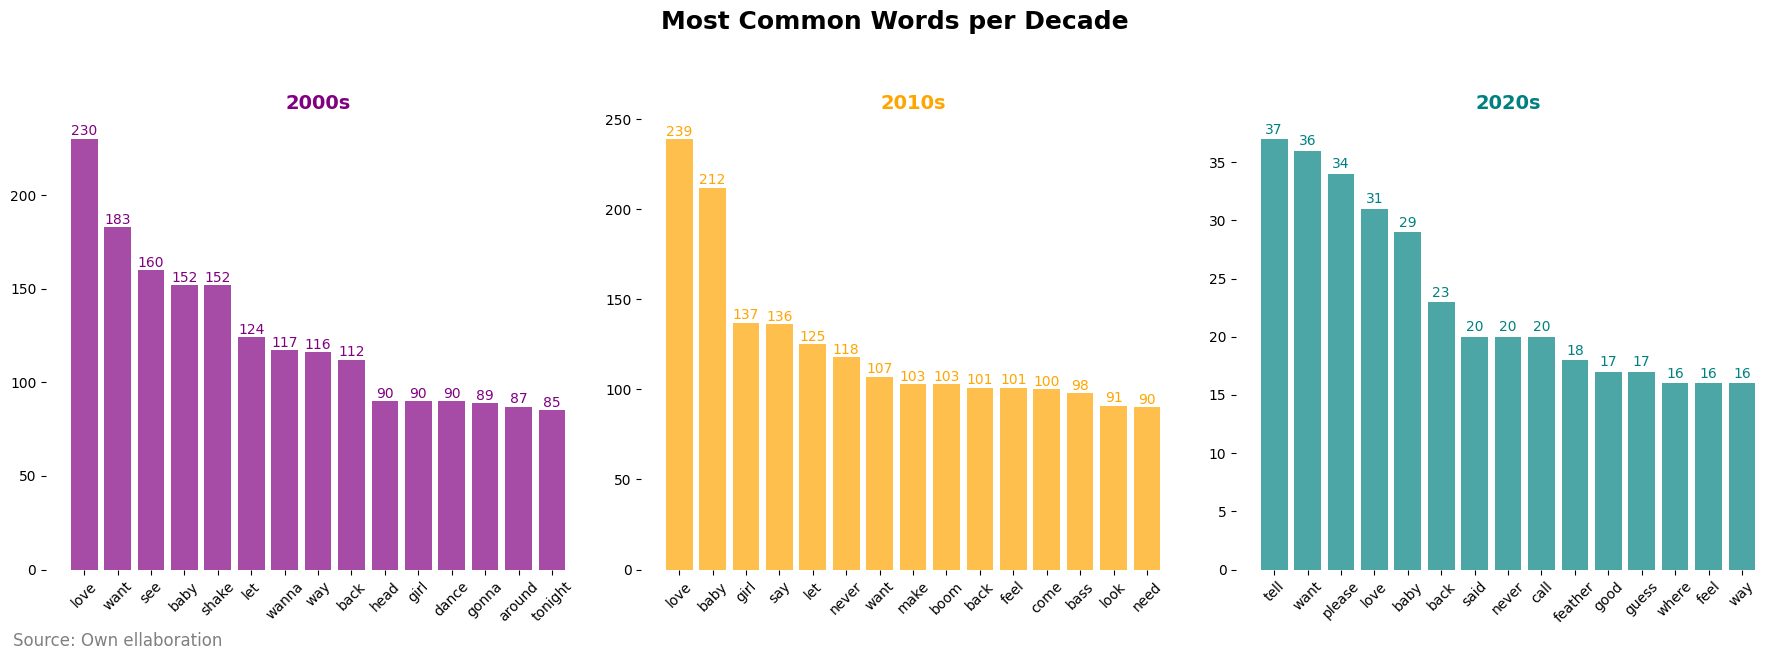

In [13]:
## Not using this plot because doesn't have any insights and not enough data of 2020s songs (we are only in 2025)

# Plot the top most common words for each decade as bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
decade_colors = ['purple', 'orange', 'teal']

for idx, decade in enumerate(decade_list):
    words, counts = zip(*top_words_decade[decade])
    ## PLot bars
    axes[idx].bar(words, counts, color=decade_colors[idx], alpha=0.7)
    ## Title & Axes
    axes[idx].set_title(f"{decade}", fontsize=14, fontweight='bold', color=decade_colors[idx])
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['left'].set_visible(False)
    axes[idx].spines['bottom'].set_visible(False)
    axes[idx].set_ylabel('')
    #axes[idx].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ## Labels
    for bar in axes[idx].patches:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width() / 2, height + 0.2, f"{int(height)}", ha='center', va='bottom', fontsize=10, color=decade_colors[idx])

## Title
fig.suptitle('Most Common Words per Decade', fontsize=18, fontweight='bold', y=1.05)
## Source annotation
fig.text(0.01, -0.01, 'Source: Own ellaboration', ha='left', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

#### Number of Songs by Emotion (Top 10 Artists BillBoard)

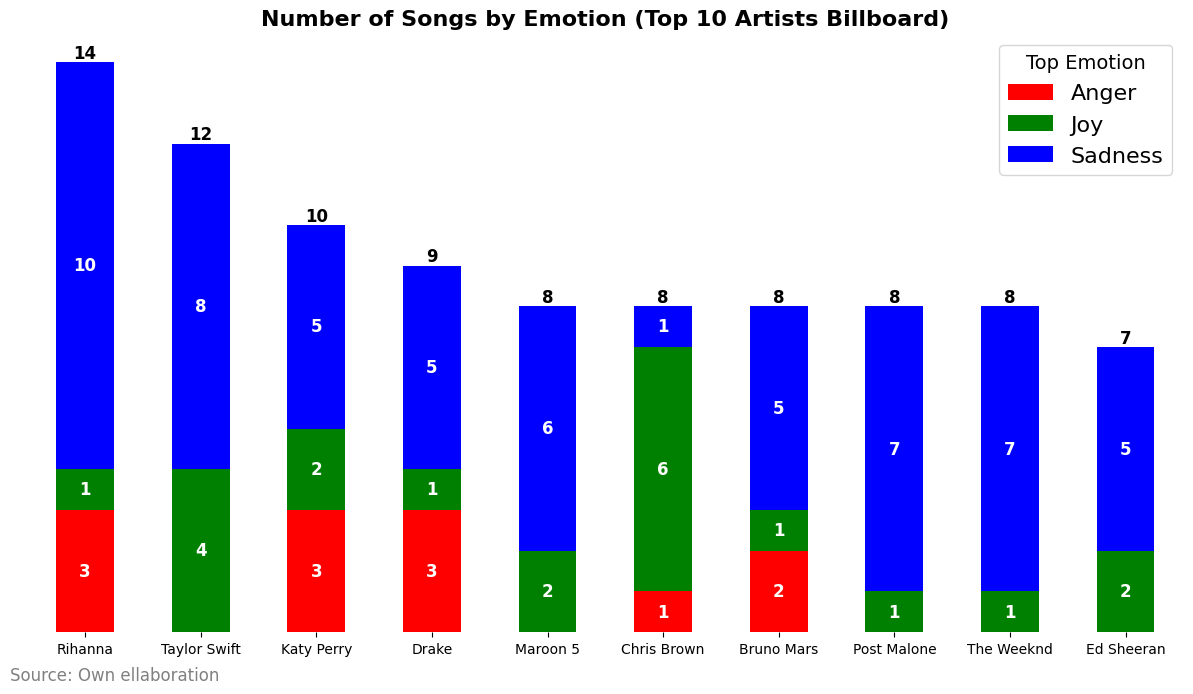

In [14]:
# Number of songs per top_emotion top 10 artists
emotion_counts = df_top10_artist.groupby(['artist', 'top_emotion']).size().unstack(fill_value=0)
plot_data = emotion_counts.loc[top10_artist.index]

ax = plot_data.plot(kind='bar',stacked=True,color=['red', 'green', 'blue'],figsize=(12, 7))

## Stacked bar
for i, artist in enumerate(plot_data.index):
    bottom = 0
    total = plot_data.loc[artist].sum()
    for j, emotion in enumerate(plot_data.columns):
        value = plot_data.loc[artist, emotion]
        if value > 0:
            ## Labels inside the bar
            ax.text(i, bottom + value / 2, str(value), ha='center', va='center', color='white', fontsize=12,fontweight='bold')
            bottom += value
    ## Labels inside top bar
    ax.text(i,total, str(total), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Titles & Axes (Legend)
plt.title('Number of Songs by Emotion (Top 10 Artists Billboard)', fontsize=16, fontweight='bold')
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Top Emotion', labels=[label.capitalize() for label in plot_data.columns])

## Remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)

## Source annotation
ax.annotate('Source: Own ellaboration', xy=(-0.015, -0.08), xycoords='axes fraction', ha='left', fontsize=12, color='gray')
# Increase legend font size
ax.legend(title='Top Emotion', labels=[label.capitalize() for label in plot_data.columns], fontsize=16, title_fontsize=14)
plt.tight_layout()
plt.show()

#
<p style="background-color:#178268; font-family: arial black; color:#FFF9ED; font-size: 300%; text-align: center;">Spotify DataFrame</p>

#### Main DF_Spotify

In [ ]:
df_spotify = pd.read_csv('data/spotify_most_stremed_songs.csv')
df_spotify.head()

,pos,title,artist,lyrics,genre,anger,joy,sadness,top_emotion,num_words
0,1,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been...,2010s,6.22,2.92,53.13,sadness,241
1,2,Shape of You,Ed Sheeran,A club isn't the best place to find a lover...,2010s,7.42,17.78,9.16,joy,672
2,3,Starboy,The Weeknd,Ayy I'm tryna put you in the worst m...,2010s,16.20,9.60,45.86,sadness,429
3,4,Someone You Loved,Lewis Capaldi,"I'm going under, and this time, I fear ther...",blues,0.91,1.02,4.55,sadness,314
4,5,As It Was,Harry Styles,"Come on, Harry, we wanna say goodnight to y...",pop,6.15,9.77,31.24,sadness,233


#### Mean Score & Count of TopEmotion

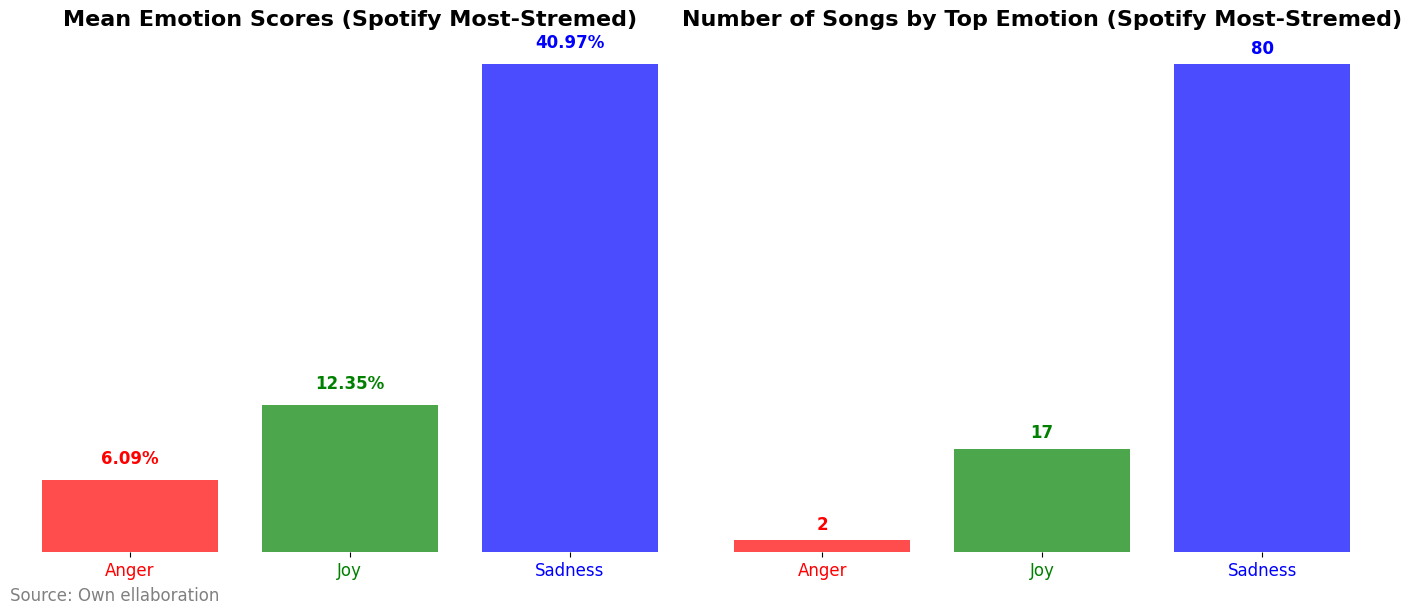

In [16]:
## data preparation
# Calculate mean of each emotion
mean_anger_spotify = df_spotify['anger'].mean()
mean_joy_spotify = df_spotify['joy'].mean()
mean_sadness_spotify = df_spotify['sadness'].mean()
# To list
mean_emotions_spotify = [mean_anger_spotify, mean_joy_spotify, mean_sadness_spotify]
# Value count of top_emotion
emotion_counts_spotify = df_spotify['top_emotion'].value_counts().reindex(emotions_list, fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bar_colors = ['red', 'green', 'blue']

## Subplot 1
# Bars
bars1 = axes[0].bar(['Anger', 'Joy', 'Sadness'], mean_emotions_spotify, color=bar_colors, alpha=0.7)
# Title & Axes
axes[0].set_title('Mean Emotion Scores (Spotify Most-Stremed)', fontsize=16, fontweight='bold', pad=10)
axes[0].set_ylabel('')
axes[0].yaxis.set_visible(False)
# Labels
for bar, color in zip(bars1, bar_colors):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color=color)
for tick_label, color in zip(axes[0].get_xticklabels(), bar_colors):
    tick_label.set_color(color)
    tick_label.set_fontsize(12)
# Remove the frame
for spine in axes[0].spines.values():
    spine.set_visible(False)

# Subplot 2
# Bars
bars2 = axes[1].bar(['Anger', 'Joy', 'Sadness'], emotion_counts_spotify.values, color=bar_colors, alpha=0.7)
# Title & Axes
axes[1].set_title('Number of Songs by Top Emotion (Spotify Most-Stremed)', fontsize=16, fontweight='bold', pad=10)
axes[1].set_ylabel('')
axes[1].yaxis.set_visible(False)
# Labels
for bar, color in zip(bars2, bar_colors):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}", ha='center', va='bottom', fontsize=12, fontweight='bold', color=color)
for tick_label, color in zip(axes[1].get_xticklabels(), bar_colors):
    tick_label.set_color(color)
    tick_label.set_fontsize(12)
# Remove the frame
for spine in axes[1].spines.values():
    spine.set_visible(False)


fig.text(0.01, -0.01, 'Source: Own ellaboration', ha='left', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

#### Emotion Scores per Genre

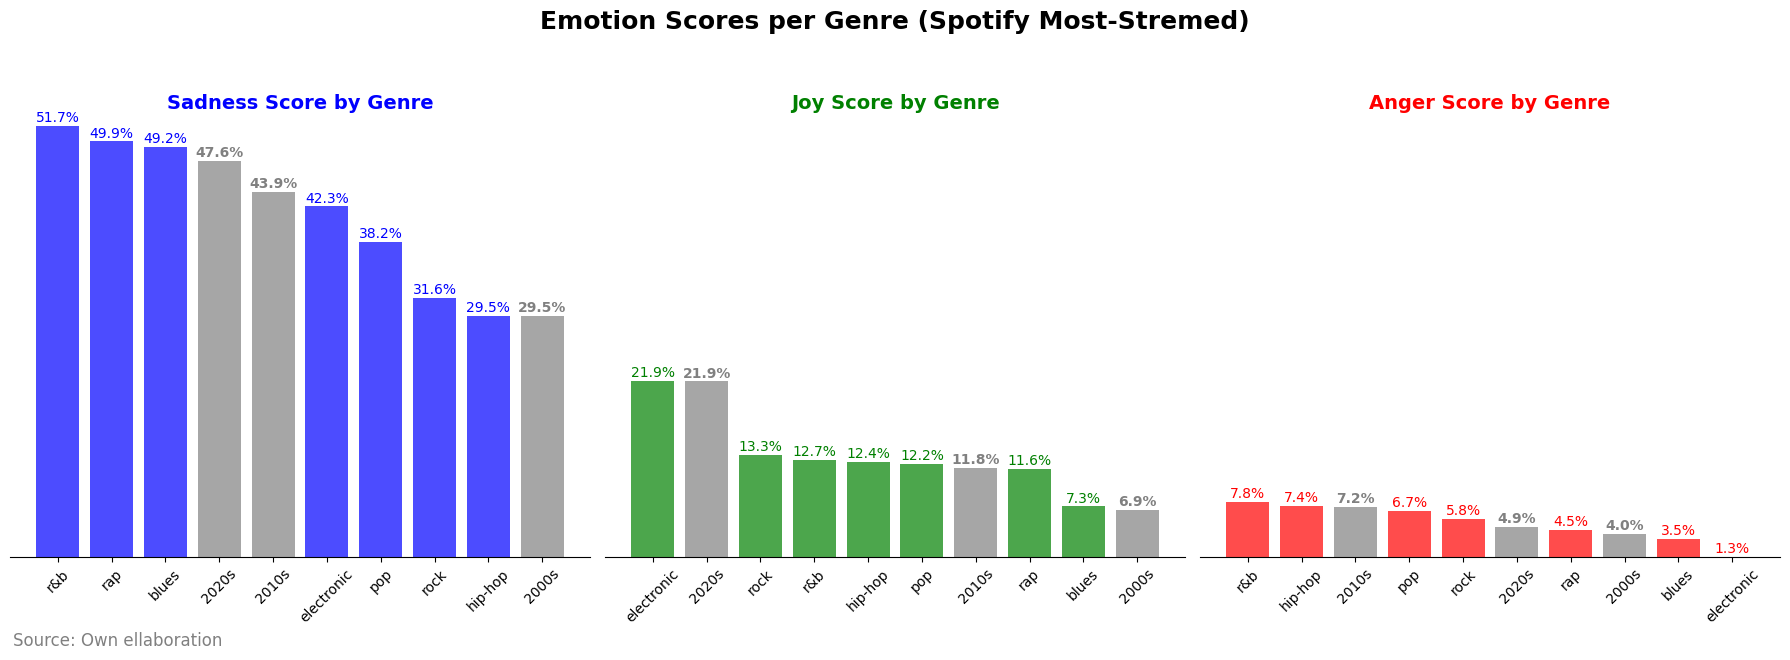

In [17]:
## Redundant plot, same info as the previous one ##
# Dataset per genres
df_mean_genre = df_spotify.groupby('genre').mean(numeric_only=True).reset_index()
df_mean_genre = df_mean_genre.drop(columns=['pos'])
# Remove 'unknown' genre
df_mean_genre = df_mean_genre[df_mean_genre['genre'] != 'unknown']
df_mean_genre.head(10)

## Support Arrays and variables
emotions = ['sadness', 'joy', 'anger']
colors = ['blue', 'green', 'red']
titles = ['Sadness Score by Genre', 'Joy Score by Genre', 'Anger Score by Genre']
decades = ['2000s', '2010s', '2020s']
ymin = min(df_mean_genre[emotions].min())
ymax = max(df_mean_genre[emotions].max())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Emotion Scores per Genre (Spotify Most-Stremed)', fontsize=18, fontweight='bold', y=1.05)
for idx, (emotion, color, title) in enumerate(zip(emotions, colors, titles)):
    # Sorted per emotion and highlight decades
    sorted_df = df_mean_genre.sort_values(by=emotion, ascending=False)
    bar_colors = ['grey' if genre in decades else color for genre in sorted_df['genre']]
    # Bars
    axes[idx].bar(sorted_df['genre'], sorted_df[emotion], color=bar_colors, alpha=0.7)
    axes[idx].set_title(title, fontsize=14, fontweight='bold', pad=12, color=color)
    # Axes
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['left'].set_visible(False)
    axes[idx].get_yaxis().set_visible(False)
    axes[idx].set_ylim(ymin, ymax) 

    ## Labels
    for bar, genre in zip(axes[idx].patches, sorted_df['genre']):
        height = bar.get_height()
        text_color = 'grey' if genre in decades else color
        fontweight = 'bold' if genre in decades else 'normal'
        axes[idx].text(bar.get_x() + bar.get_width() / 2,height + 0.1,f"{height:.1f}%",ha='center',va='bottom',fontsize=10,color=text_color,fontweight=fontweight)

## Source annotation
fig.text(0.01, -0.01, 'Source: Own ellaboration', ha='left', fontsize=12, color='gray')


plt.tight_layout()
plt.show()

#### Top 10 Most Stremed Songs Emotion Score

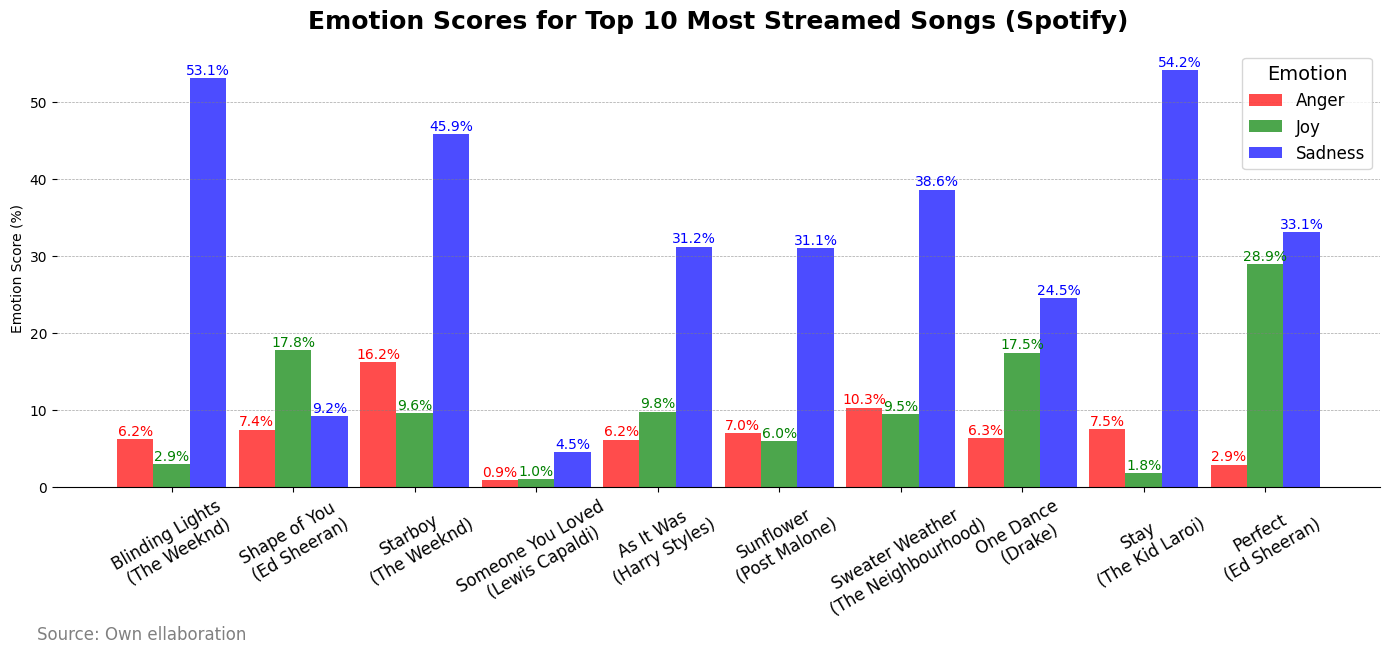

In [18]:
# çtop 10 Most Streamed Songs (Spotify)
top10_spotify = df_spotify.head(10)
xtick_labels = [f"{row['title']}\n ({row['artist']})" for _, row in top10_spotify.iterrows()]
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.3
x = range(len(top10_spotify))

ax.bar([i - bar_width for i in x], top10_spotify['anger'], width=bar_width, color='red', label='Anger', alpha=0.7)
ax.bar(x, top10_spotify['joy'], width=bar_width, color='green', label='Joy', alpha=0.7)
ax.bar([i + bar_width for i in x], top10_spotify['sadness'], width=bar_width, color='blue', label='Sadness', alpha=0.7)

# Labels
for i in x:
    ax.text(i - bar_width, top10_spotify['anger'].iloc[i] + 0.1, f"{top10_spotify['anger'].iloc[i]:.1f}%", ha='center', va='bottom', color='red', fontsize=10)
    ax.text(i, top10_spotify['joy'].iloc[i] + 0.1, f"{top10_spotify['joy'].iloc[i]:.1f}%", ha='center', va='bottom', color='green', fontsize=10)
    ax.text(i + bar_width, top10_spotify['sadness'].iloc[i] + 0.1, f"{top10_spotify['sadness'].iloc[i]:.1f}%", ha='center', va='bottom', color='blue', fontsize=10)

# x-axiS
ax.set_xticks(x)
ax.set_xticklabels(xtick_labels, rotation=30, ha='center', fontsize=12)

# Titles & grid
ax.set_title('Emotion Scores for Top 10 Most Streamed Songs (Spotify)', fontsize=18, fontweight='bold', pad=15)
ax.set_ylabel('Emotion Score (%)')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# REmove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Legend
ax.legend(fontsize=12, title='Emotion', title_fontsize=14)

# Source annotation
ax.annotate('Source: Own ellaboration', xy=(-0.015, -0.35), xycoords='axes fraction', ha='left', fontsize=12, color='gray')

plt.tight_layout()
plt.show()